In [40]:
import pandas as pd
pd.__version__

'1.5.2'

**第一步：基础设施REITs基金**

In [41]:
reits_id = {'180101':'招商蛇口产园REIT',
            '180102':'华夏合肥高新REIT',
            '180103':'华夏和达高科REIT',
            '180201':'平安广州广河REIT',
            '180202':'华夏越秀高速REIT',
            '180301':'红土创新盐田港REIT',
            '180401':'鹏华深圳能源REIT',
            '180501':'红土创新深圳安居REIT',
            '180801':'中航首钢绿能REIT',
            '508000':'华安张江光大REIT',
            '508001':'浙江沪杭甬REIT',
            '508006':'富国首创水务REIT',
            '508008':'国金中国铁建REIT',
            '508009':'中金安徽交控REIT',
            '508018':'华夏中国交建REIT',
            '508021':'国君临港产园REIT',
            '508027':'东吴苏园产业REIT',
            '508056':'中金普洛斯REIT',
            '508058':'中金厦门安居REIT',
            '508066':'华泰江苏交控REIT',
            '508068':'华夏北京保障房REIT',
            '508077':'华夏华润有巢REIT',
            '508088':'国君东久新经济REIT',
            '508099':'建信中关村REIT'}
type(reits_id)

dict

In [43]:
reits_id.__len__()

24

**第二步：导入基础设施公募REITs历史行情数据**

In [44]:
reits_value = dict()
i = 0
for k in reits_id.keys():
    reits_value[k] = pd.read_excel('data/基础设施公募REITs历史行情数据-数据导入表（勿动）.xlsx',
                                   sheet_name= i,
                                   header=2,
                                   index_col='日期')
    i = i + 1

reits_value.keys()

dict_keys(['180101', '180102', '180103', '180201', '180202', '180301', '180401', '180501', '180801', '508000', '508001', '508006', '508008', '508009', '508018', '508021', '508027', '508056', '508058', '508066', '508068', '508077', '508088', '508099'])

In [45]:
reits_value.__len__()

24

**第三步：绘制基础设施公募REITs历史行情图**

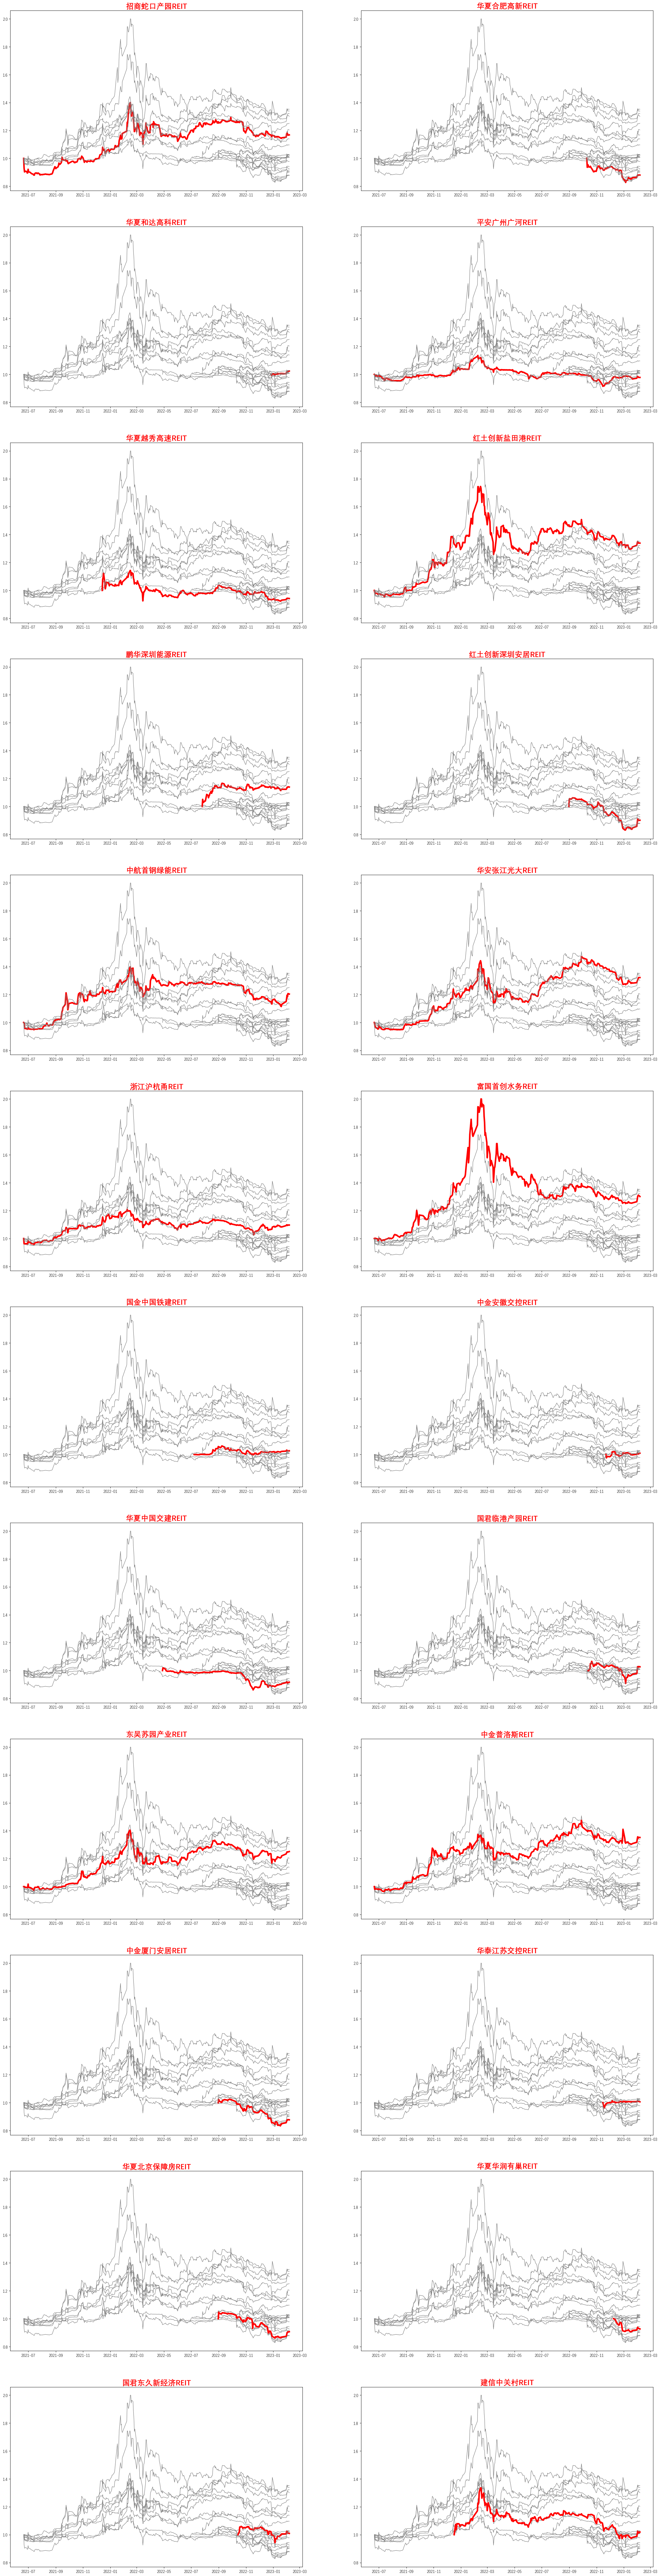

In [46]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['font.family'] = 'Dengxian'
plt.rcParams['axes.unicode_minus'] = False

COLORS = ['red','gray']
LINES = [4,1]

fig, axs = plt.subplots(12,2, figsize=(30,120))
for i, v in zip(range(24),reits_id.keys()):
    r = int(i/2)
    c = int(i % 2)
    for k in reits_value.keys():
        if k == v:
            col = COLORS[0]
            l = LINES[0]
        else:
            col = COLORS[1]
            l = LINES[1]

        x = reits_value[k].index
        y = reits_value[k]['收盘价']/reits_value[k]['收盘价'][0]
        axs[r,c].plot(x,y,color=col,linewidth=l)
    axs[r,c].set_title(reits_id[v],fontdict={'fontsize':20,'fontweight':'bold','color':'red'})

In [56]:
import riskfolio as rp
rp.__version__

'3.3.0'

**第四步：构建REITs基金累计净值数据集**

In [66]:
rdata = pd.DataFrame()

for k in reits_value.keys():
    rdata = pd.concat([rdata,reits_value[k]['收盘价']], axis=1)

rdata.columns = list(reits_id.values())

rdata

招商蛇口产园REIT  华夏合肥高新REIT  华夏和达高科REIT  平安广州广河REIT  华夏越秀高速REIT  \
2021-06-21    2.650000         NaN         NaN   13.108000         NaN   
2021-06-22    2.464000         NaN         NaN   13.050000         NaN   
2021-06-23    2.393000         NaN         NaN   13.026000         NaN   
2021-06-24    2.400000         NaN         NaN   12.963000         NaN   
2021-06-25    2.407000         NaN         NaN   13.045000         NaN   
...                ...         ...         ...         ...         ...   
2023-01-31    3.114526       2.494       3.111   12.909367    8.206091   
2023-02-01    3.132187       2.506       3.120   12.912627    8.221806   
2023-02-02    3.117643       2.499       3.113   12.874594    8.225996   
2023-02-03    3.090632       2.507       3.132   12.822435    8.220758   
2023-02-06    3.095826       2.506       3.133   12.821348    8.211329   

            红土创新盐田港REIT  鹏华深圳能源REIT  红土创新深圳安居REIT  中航首钢绿能REIT  华安张江光大REIT  \
2021-06-21     2.367000         NaN           NaN   14.711000    3.166000   
2021-06-22     2.335000         NaN           NaN   14.700000    3.121000   
2021-06-23     2.308000         NaN           NaN   14.288000    3.059000   
2021-06-24     2.323000         NaN           NaN   14.070000    3.062000   
2021-06-25     2.324000         NaN           NaN   14.078000    3.051000   
...                 ...         ...           ...         ...         ...   
2023-01-31     3.174450       8.077         2.857   17.242640    4.106027   
2023-02-01     3.197836       8.150         2.937   17.590575    4.130862   
2023-02-02     3.169366       8.141         2.932   17.419441    4.160870   
2023-02-03     3.172416       8.174         2.907   17.759443    4.185705   
2023-02-06     3.169366       8.161         2.910   17.706176    4.185705   

            ...  华夏中国交建REIT  国君临港产园REIT  东吴苏园产业REIT  中金普洛斯REIT  中金厦门安居REIT  \
2021-06-21  ...         NaN         NaN    3.907000   3.972000         NaN   
2021-06-22  ...         NaN         NaN    3.907000   3.894000         NaN   
2021-06-23  ...         NaN         NaN    3.906000   3.911000         NaN   
2021-06-24  ...         NaN         NaN    3.885000   3.901000         NaN   
2021-06-25  ...         NaN         NaN    3.887000   3.909000         NaN   
...         ...         ...         ...         ...        ...         ...   
2023-01-31  ...    8.842653       5.409    4.853953   5.323707       2.928   
2023-02-01  ...    8.819181       5.506    4.880528   5.389124       2.964   
2023-02-02  ...    8.754890       5.478    4.872351   5.350704       2.958   
2023-02-03  ...    8.786525       5.510    4.876439   5.373548       2.968   
2023-02-06  ...    8.805915       5.502    4.888704   5.370433       2.964   

            华泰江苏交控REIT  华夏北京保障房REIT  华夏华润有巢REIT  国君东久新经济REIT  建信中关村REIT  
2021-06-21         NaN          NaN         NaN          NaN        NaN  
2021-06-22         NaN          NaN         NaN          NaN        NaN  
2021-06-23         NaN          NaN         NaN          NaN        NaN  
2021-06-24         NaN          NaN         NaN          NaN        NaN  
2021-06-25         NaN          NaN         NaN          NaN        NaN  
...                ...          ...         ...          ...        ...  
2023-01-31       7.726        2.879       2.628        3.944   4.188573  
2023-02-01       7.724        2.936       2.650        3.947   4.261365  
2023-02-02       7.707        2.936       2.631        3.918   4.210815  
2023-02-03       7.723        2.954       2.626        3.907   4.215870  
2023-02-06       7.685        2.959       2.616        3.895   4.238112  

[395 rows x 24 columns]

**第五步：相关性**

C:\Users\ThinkPad\.conda\envs\qtconda\lib\site-packages\riskfolio\PlotFunctions.py:2256: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


<Axes: >

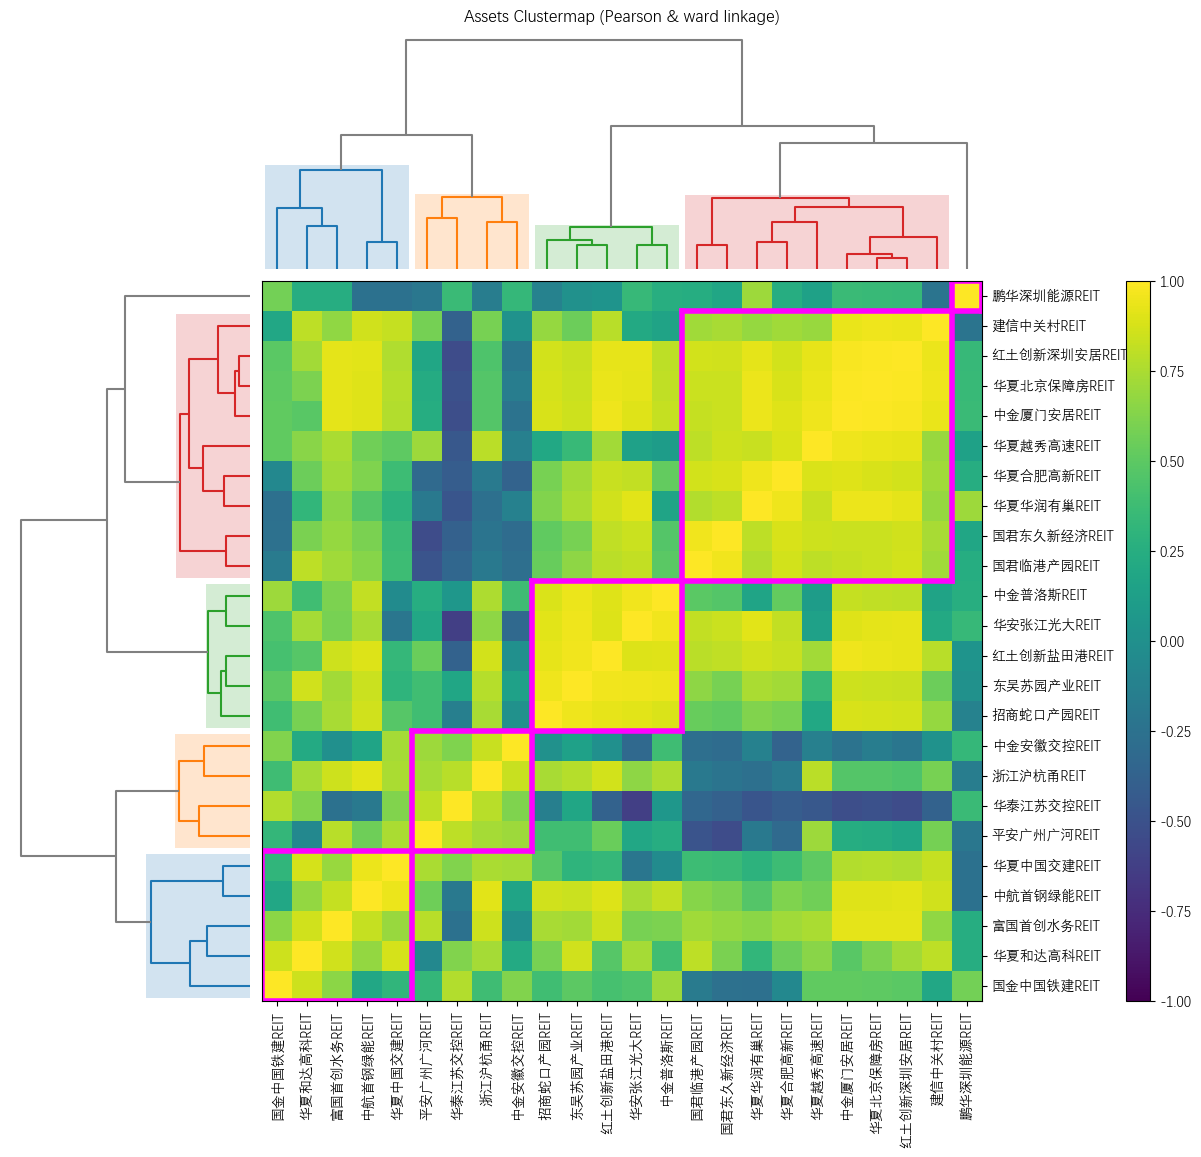

In [67]:
rp.plot_clusters(returns=rdata)